# Jianling Liu's Code

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import isnan
import operator

## Load and preprocess data

In [2]:
df_1 = pd.read_csv('green_tripdata_2017-01.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_2 = pd.read_csv('green_tripdata_2017-02.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_3 = pd.read_csv('green_tripdata_2017-03.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_4 = pd.read_csv('green_tripdata_2017-04.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_5 = pd.read_csv('green_tripdata_2017-05.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_6 = pd.read_csv('green_tripdata_2017-06.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_7 = pd.read_csv('green_tripdata_2017-07.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_8 = pd.read_csv('green_tripdata_2017-08.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_9 = pd.read_csv('green_tripdata_2017-09.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_10 = pd.read_csv('green_tripdata_2017-10.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_11 = pd.read_csv('green_tripdata_2017-11.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_12 = pd.read_csv('green_tripdata_2017-12.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")

In [3]:
# add month column to all month data
df_1['month'] = 1
pay=df_1.groupby('payment_type')
df_1 = pay.get_group(1)

df_2['month'] = 2
pay=df_2.groupby('payment_type')
df_2 = pay.get_group(1)

df_3['month'] = 3
pay=df_3.groupby('payment_type')
df_3 = pay.get_group(1)

df_4['month'] = 4
pay=df_4.groupby('payment_type')
df_4 = pay.get_group(1)

df_5['month'] = 5
pay=df_5.groupby('payment_type')
df_5 = pay.get_group(1)

df_6['month'] = 6
pay=df_6.groupby('payment_type')
df_6 = pay.get_group(1)

df_7['month'] = 7
pay=df_7.groupby('payment_type')
df_7 = pay.get_group(1)

df_8['month'] = 8
pay=df_8.groupby('payment_type')
df_8 = pay.get_group(1)

df_9['month'] = 9
pay=df_9.groupby('payment_type')
df_9 = pay.get_group(1)

df_10['month'] = 10
pay=df_10.groupby('payment_type')
df_10 = pay.get_group(1)

df_11['month'] = 11
pay=df_11.groupby('payment_type')
df_11 = pay.get_group(1)

df_12['month'] = 12
pay=df_12.groupby('payment_type')
df_12 = pay.get_group(1)

In [4]:
#concatenate the data
month_data = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12]
df = pd.concat(month_data)

In [5]:
df.head(3)

,VendorID,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,month
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:04:02,2,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,1
2017-01-01 00:00:28,2,2017-01-01 00:13:31,N,1,179,226,1,4.14,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,1,1.0,1
2017-01-01 00:01:17,2,2017-01-01 00:09:38,N,1,41,238,1,1.61,8.5,0.5,0.5,1.96,0.0,NaN,0.3,11.76,1,1.0,1


In [60]:
len(df_12)

466304

# Trip distance vs. Tip amount in 2017

In [ ]:
#Compare trip distance to tip amount
x = df['trip_distance']
y = df['tip_amount']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Trip Distance vs Tip Amount')
xlabel('Trip Distance (miles)')
ylabel('Tip Amount ($)')
plt.savefig('TripDistancevsTipAmount.jpg')
plt.show()

## Avergae Tip Amount in one day for each month

In [35]:

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

tripD = np.zeros((12,24))
i = 0
num = np.zeros((12,24))
for index,row in df.iterrows():
    mon = row['month']
    time = int(index.hour)
    tripD[mon-1][time] = tripD[mon-1][time]+row['tip_amount']
    num[mon-1][time] +=1
    

In [36]:
avg_tip = np.divide(tripD,num)

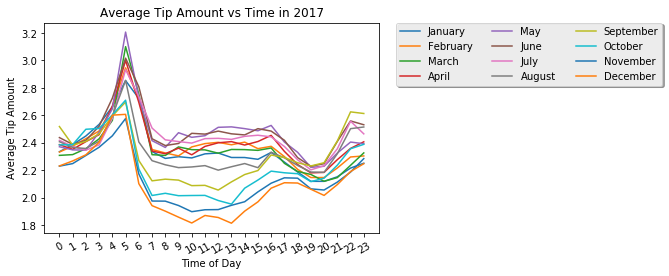

In [63]:
for i in range(0,12):
    plt.title('Average Tip Amount vs Time in 2017')
    plt.plot(range(24),avg_tip[i])
#plt.plot(range(6),avg12)
plt.legend(months,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3, fancybox=True, shadow=True)
xticks(np.arange(24))
plt.xticks(rotation=30)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')
plt.savefig('TimeOfDay_TipAmount.jpg')
plt.show()

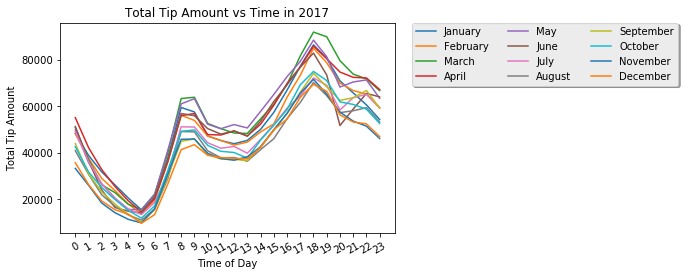

In [76]:
for i in range(0,12):
    plt.title('Total Tip Amount vs Time in 2017')
    plt.plot(range(24),tripD[i])
#plt.plot(range(6),avg12)
plt.legend(months,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3, fancybox=True, shadow=True)
xticks(np.arange(24))
plt.xticks(rotation=30)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Time of Day')
plt.ylabel('Total Tip Amount')
plt.savefig('TimeOfDay_TipAmount_total.jpg')
plt.show()

## Avergae&Total Tip Amount in weekdays for each month

In [64]:
## Calculate counts for 24 hours
weekend = {5,6}
weekdays = {0,1,2,3,4}

tipWeekdays = np.zeros((12,24))
tipWeekend = np.zeros((12,24))
i = 0
num1 = np.zeros((12,24))
num2 = np.zeros((12,24))

for index,row in df.iterrows():
    mon = row['month']
    time = int(index.hour)
    if index.dayofweek in weekdays:
        tipWeekdays[mon-1][time] = tipWeekdays[mon-1][time]+row['tip_amount']
        num1[mon-1][time] +=1
    else:
        tipWeekend[mon-1][time] = tipWeekend[mon-1][time]+row['tip_amount']
        num2[mon-1][time] +=1

In [65]:
avg_weekdays = np.divide(tipWeekdays,num1)
avg_weekend = np.divide(tipWeekend,num2)

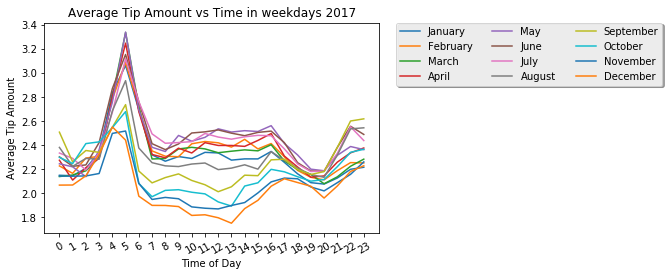

In [66]:
## Average
for i in range(0,12):
    plt.title('Average Tip Amount vs Time in weekdays 2017')
    plt.plot(range(24),avg_weekdays[i])

plt.legend(months,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3, fancybox=True, shadow=True)
xticks(np.arange(24))
plt.xticks(rotation=30)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')
plt.savefig('TimeOfDay_TipAmount_weekdays.jpg')
plt.show()

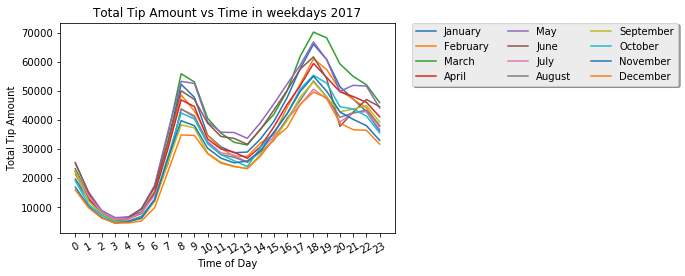

In [73]:
## Total
for i in range(0,12):
    plt.title('Total Tip Amount vs Time in weekdays 2017')
    plt.plot(range(24),tipWeekdays[i])

plt.legend(months,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3, fancybox=True, shadow=True)
xticks(np.arange(24))
plt.xticks(rotation=30)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Time of Day')
plt.ylabel('Total Tip Amount')
plt.savefig('TimeOfDay_TipAmount_total_weekdays.jpg')
plt.show()

## Avergae&Total Tip Amount in weekend for each month

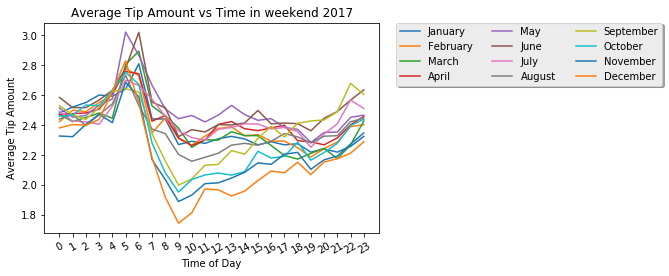

In [74]:
## Average
for i in range(0,12):
    plt.title('Average Tip Amount vs Time in weekend 2017')
    plt.plot(range(24),avg_weekend[i])

plt.legend(months,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3, fancybox=True, shadow=True)
xticks(np.arange(24))
plt.xticks(rotation=30)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')
plt.savefig('TimeOfDay_TipAmount_weekend.jpg')
plt.show()

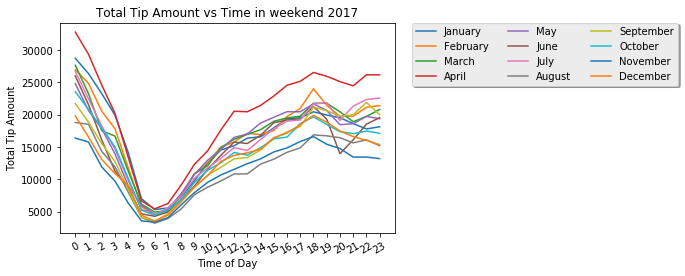

In [75]:
## Total
for i in range(0,12):
    plt.title('Total Tip Amount vs Time in weekend 2017')
    plt.plot(range(24),tipWeekend[i])

plt.legend(months,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3, fancybox=True, shadow=True)
xticks(np.arange(24))
plt.xticks(rotation=30)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Time of Day')
plt.ylabel('Total Tip Amount')
plt.savefig('TimeOfDay_TipAmount_total_weekend.jpg')
plt.show()

## TOP PUL and DOL based on Tip_amount for 2017

In [77]:
PUloc = [0]*266
num = [0]*266
for index, row in df.iterrows():
    PUloc[row['PULocationID']] += row['tip_amount']
    num[row['PULocationID']] += 1
puAvgTip = np.divide(PUloc,num)

#PULdict = dict.fromkeys(range(266),puAvgTip)
PULdict = dict(zip(range(266), puAvgTip))


/Users/Jenny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


In [83]:
clean_dict = {k: PULdict[k] for k in PULdict if not isnan(PULdict[k])}
sorted_x = sorted(clean_dict.items(), key=operator.itemgetter(1),reverse = True)
top20 = sorted_x[:20]
totalAvg = sum(PUloc)/sum(num)

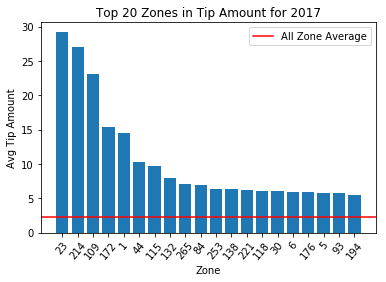

In [94]:
#Plot the top 20 pickup zones  for 2017
plt.title('Top 20 Zones in Tip Amount for 2017')
plt.bar(range(20), [val[1] for val in top20], align='center')
plt.xticks(range(20), [val[0] for val in top20])
plt.xticks(rotation=50)
#plt.plot(range(20),[top20[8][1] for d in range(20)],'r--')
avg = plt.axhline(totalAvg, color='r')
labels = ['All Zone Average']
plt.legend([avg], labels)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Zone')
plt.ylabel('Avg Tip Amount')
plt.savefig('top20zones_tipAvg_2017.jpg')
plt.show()

In [6]:
DFloc = [0]*266
num = [0]*266
for index, row in df.iterrows():
    DFloc[row['DOLocationID']] += row['tip_amount']
    num[row['DOLocationID']] += 1
dfAvgTip = np.divide(DFloc,num)
DOLdict = dict(zip(range(266), dfAvgTip))


/Users/Jenny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


In [7]:
clean_dict = {k: DOLdict[k] for k in DOLdict if not isnan(DOLdict[k])}
sorted_y = sorted(clean_dict.items(), key=operator.itemgetter(1),reverse = True)
top20_DOL = sorted_y[:20]
totalAvg = sum(DFloc)/sum(num)

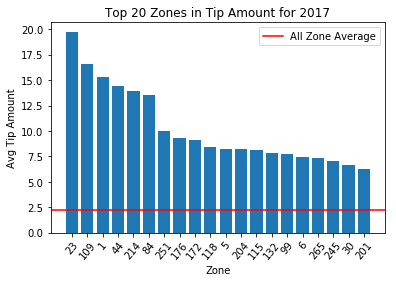

In [8]:
#Plot the top 20 drof-off zones for 2017
plt.title('Top 20 Zones in Tip Amount for 2017')
plt.bar(range(20), [val[1] for val in top20_DOL], align='center')
plt.xticks(range(20), [val[0] for val in top20_DOL])
plt.xticks(rotation=50)
avg = plt.axhline(totalAvg, color='r')
labels = ['All Zone Average']
plt.legend([avg], labels)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Zone')
plt.ylabel('Avg Tip Amount')
plt.savefig('top20_DOLzones_tipAvg_2017.jpg')
plt.show()